## Excercise showing long-short-term memory (LSTM) Recurrent Neural Networks 
### Problem with multiple input variables. 



###  Practicum #1 - Maggie Sleziak

<B> 
<BR>Daily Summary from the Station at the Denver International Airport. 
<BR>Data-range: January 1, 2010 to August 26, 2018. 
<BR>These are daily measurements of precipitation in inches, average wind speed in miles, 
<BR>snowfall in inches, snow depth in inches, maximum/ minimum temperature in FH
<BR>National Centers for Environmental Information,  NCEI. Climate Data Online. 
<BR>Retrieved from https://www.ncdc.noaa.gov/cdo-web/

<BR><BR>
Features: 
<B>

<br>
<br>


In [1]:

# - Load libraries
from pandas import read_csv
from datetime import datetime
from pandas import concat
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas import DataFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pandas import DataFrame
from math import sqrt
from numpy import concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from datetime import datetime
%matplotlib inline
pyplot.rcParams['figure.figsize'] = [10, 5]

Using TensorFlow backend.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


<BR><BR>
<B>Load Data Already Prepared</B>

In [2]:
# Start time to time this process: 
startTime = datetime.now()

# Load dataset
dailyLag1 = pd.read_csv("./data/dailyTemp.csv")
print
print('Info:')
dailyLag1.info()
print
print('head:')
dailyLag1.head(10)


<function print>

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 4 columns):
date     3160 non-null object
yTavg    3160 non-null float64
hum      3160 non-null int64
dewp     3160 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 98.8+ KB


<function print>

head:


,date,yTavg,hum,dewp
0,2010-01-01,26.0,59,13
1,2010-01-02,28.0,74,21
2,2010-01-03,26.0,80,23
3,2010-01-04,23.5,68,15
4,2010-01-05,33.0,52,21
5,2010-01-06,18.0,77,10
6,2010-01-07,-1.5,67,-9
7,2010-01-08,11.0,52,-2
8,2010-01-09,25.0,49,9
9,2010-01-10,32.0,55,16


In [3]:
## https://chrisalbon.com/python/basics/strings_to_datetime/

dailyLag1['date'] = pd.to_datetime(dailyLag1['date'], box=True)

In [4]:
dailyLag1.info()

# Change to datimeIndex
# https://www.programcreek.com/python/example/82175/pandas.DatetimeIndex
dailyLag1 = dailyLag1.set_index('date')

print(dailyLag1.head(10))
dailyLag1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 4 columns):
date     3160 non-null datetime64[ns]
yTavg    3160 non-null float64
hum      3160 non-null int64
dewp     3160 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 98.8 KB
            yTavg  hum  dewp
date                        
2010-01-01   26.0   59    13
2010-01-02   28.0   74    21
2010-01-03   26.0   80    23
2010-01-04   23.5   68    15
2010-01-05   33.0   52    21
2010-01-06   18.0   77    10
2010-01-07   -1.5   67    -9
2010-01-08   11.0   52    -2
2010-01-09   25.0   49     9
2010-01-10   32.0   55    16
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3160 entries, 2010-01-01 to 2018-08-26
Data columns (total 3 columns):
yTavg    3160 non-null float64
hum      3160 non-null int64
dewp     3160 non-null int64
dtypes: float64(1), int64(2)
memory usage: 98.8 KB


In [5]:
# Look for any NAs - we took them out in R, so just checking. 
print(dailyLag1.isna().any())

yTavg    False
hum      False
dewp     False
dtype: bool


In [6]:
# pd.set_option('precision', 1) 
print
print("Descriptions: ")
dailyLag1.describe()

<function print>

Descriptions: 


,yTavg,hum,dewp
count,3160.000000,3160.000000,3160.000000
mean,51.986709,49.882278,29.942405
std,18.462632,19.026266,14.157723
min,-10.000000,10.000000,-13.000000
25%,38.500000,34.000000,19.000000
50%,52.500000,47.000000,29.000000
75%,68.500000,64.000000,42.000000
max,88.000000,99.000000,60.000000


In [7]:
# Get columns with values from the dataset (not the date column)
values = dailyLag1.values
values = values.astype('float32')
print('After changing to float: ')

# Convert to float
floatDF = pd.DataFrame(values) 

print(np.isnan(floatDF).any())
print(np.isinf(floatDF).any())

print(floatDF.dtypes)
print(floatDF.shape)
floatDF.head(10)

After changing to float: 
0    False
1    False
2    False
dtype: bool
0    False
1    False
2    False
dtype: bool
0    float32
1    float32
2    float32
dtype: object
(3160, 3)


,0,1,2
0,26.0,59.0,13.0
1,28.0,74.0,21.0
2,26.0,80.0,23.0
3,23.5,68.0,15.0
4,33.0,52.0,21.0
5,18.0,77.0,10.0
6,-1.5,67.0,-9.0
7,11.0,52.0,-2.0
8,25.0,49.0,9.0
9,32.0,55.0,16.0


In [8]:
# Normalize features so all are from 0 to 1
## Scaling features. 
print
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print('After normalizing:')
print(scaled.shape)
print(scaled[:10,])
print

<function print>

After normalizing:
(3160, 3)
[[0.36734694 0.5505618  0.3561644 ]
 [0.3877551  0.7191011  0.46575344]
 [0.36734694 0.7865169  0.49315068]
 [0.34183672 0.65168536 0.38356164]
 [0.43877548 0.4719101  0.46575344]
 [0.28571427 0.75280905 0.31506848]
 [0.08673469 0.6404494  0.05479453]
 [0.2142857  0.4719101  0.15068494]
 [0.35714287 0.43820223 0.30136988]
 [0.4285714  0.505618   0.39726028]]


<function print>

<BR><BR>
    <B>Change to Supervised:</B>

In [9]:
# Code retrieved and adapted from:  Deep Learning for Time Series Forecasting by 
# Jason Brownlee

# Add time lags based on number features and number of lag hours
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [10]:
# specify the number of lag hours **This time is 3 hours** 
n_hours = 3
n_features = 3
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)
print(reframed.head())
print


(3157, 12)
   var1(t-3)  var2(t-3)  var3(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  \
3   0.367347   0.550562   0.356164   0.387755   0.719101   0.465753   
4   0.387755   0.719101   0.465753   0.367347   0.786517   0.493151   
5   0.367347   0.786517   0.493151   0.341837   0.651685   0.383562   
6   0.341837   0.651685   0.383562   0.438775   0.471910   0.465753   
7   0.438775   0.471910   0.465753   0.285714   0.752809   0.315068   

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)   var2(t)   var3(t)  
3   0.367347   0.786517   0.493151  0.341837  0.651685  0.383562  
4   0.341837   0.651685   0.383562  0.438775  0.471910  0.465753  
5   0.438775   0.471910   0.465753  0.285714  0.752809  0.315068  
6   0.285714   0.752809   0.315068  0.086735  0.640449  0.054795  
7   0.086735   0.640449   0.054795  0.214286  0.471910  0.150685  


<function print>

<BR><BR>
    <B>Split into train/test and input and output:</B>

In [11]:
# Split into train and test sets with X (features) and Y (output/target)
values = reframed.values
# Fit for 5 first years, the rest for validation: 
n_train_hours = 365 * 5
train = values[:n_train_hours, :]
print(train.shape)


(1825, 12)


In [12]:
# User remeinder for testing 
test = values[n_train_hours:, :]
print(test.shape)
print

(1332, 12)


<function print>

In [13]:
# split into input and outputs - remove extra lagged features
n_obs = n_hours * n_features
print ("Lags:", n_hours, " Original Features:", n_features, " Total Lagged Observations:",  n_obs)
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print('Shape for train_X, train_y, test_X, test_y:')
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


Lags: 3  Original Features: 3  Total Lagged Observations: 9
Shape for train_X, train_y, test_X, test_y:
(1825, 9) (1825,) (1332, 9) (1332,)


<BR><BR>
<B> Design and Fit the LSTM Model


In [14]:

# Exploring with different numbers of epochs, and neurons - for several iterations
# model is fit using the efficient Adam version of stochastic gradient descent
# optimized using the mean squared error, or ‘mse’, loss function.
# Define model: 
# Input shape is 3 time steps * 3 features so total 9 (x_features).
%matplotlib inline


def fit_model(train_X, train_y, test_X, test_y, batch_num, epoch_num, neurons):
    modelLSTM3 = Sequential()
    modelLSTM3.add(LSTM(neurons, input_shape=(train_X.shape[1], train_X.shape[2])))
    modelLSTM3.add(Dense(1))
    modelLSTM3.compile(loss='mean_squared_error', optimizer='adam')
    history = modelLSTM3.fit(train_X, train_y, epochs=epoch_num, batch_size=batch_num, validation_data=(test_X, test_y), verbose=2, shuffle=False)
   
    # The Train and test loss are printed at the end of each training epoch. 
    # If the test loss drops below training loss, the model may be overfitting the training data. 

    pyplot.rcParams['figure.figsize'] = [10, 5]
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()
    print("If the test loss drops below training loss, ")
    print("the model may be overfitting the training data. ")
    print ()
    return modelLSTM3

Train on 1825 samples, validate on 1332 samples
Epoch 1/1500
 - 1s - loss: 0.4639 - val_loss: 0.3916
Epoch 2/1500
 - 0s - loss: 0.3234 - val_loss: 0.2773
Epoch 3/1500
 - 0s - loss: 0.2242 - val_loss: 0.1835
Epoch 4/1500
 - 0s - loss: 0.1376 - val_loss: 0.0984
Epoch 5/1500
 - 0s - loss: 0.0664 - val_loss: 0.0389
Epoch 6/1500
 - 0s - loss: 0.0280 - val_loss: 0.0169
Epoch 7/1500
 - 0s - loss: 0.0174 - val_loss: 0.0129
Epoch 8/1500
 - 0s - loss: 0.0153 - val_loss: 0.0117
Epoch 9/1500
 - 0s - loss: 0.0140 - val_loss: 0.0107
Epoch 10/1500
 - 0s - loss: 0.0129 - val_loss: 0.0098
Epoch 11/1500
 - 0s - loss: 0.0119 - val_loss: 0.0090
Epoch 12/1500
 - 0s - loss: 0.0109 - val_loss: 0.0083
Epoch 13/1500
 - 1s - loss: 0.0101 - val_loss: 0.0078
Epoch 14/1500
 - 1s - loss: 0.0095 - val_loss: 0.0073
Epoch 15/1500
 - 0s - loss: 0.0089 - val_loss: 0.0069
Epoch 16/1500
 - 1s - loss: 0.0085 - val_loss: 0.0067
Epoch 17/1500
 - 0s - loss: 0.0081 - val_loss: 0.0065
Epoch 18/1500
 - 0s - loss: 0.0079 - val_lo

 - 0s - loss: 0.0058 - val_loss: 0.0052
Epoch 152/1500
 - 0s - loss: 0.0058 - val_loss: 0.0052
Epoch 153/1500
 - 0s - loss: 0.0058 - val_loss: 0.0052
Epoch 154/1500
 - 0s - loss: 0.0058 - val_loss: 0.0052
Epoch 155/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 156/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 157/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 158/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 159/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 160/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 161/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 162/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 163/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 164/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 165/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 166/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 167/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 168/1500
 - 0s - loss: 0.0058 - val_loss: 0.0051
Epoch 169/1500
 - 0s - lo

 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 301/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 302/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 303/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 304/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 305/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 306/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 307/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 308/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 309/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 310/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 311/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 312/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 313/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 314/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 315/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 316/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 317/1500
 - 0s - loss: 0.0056 - val_loss: 0.0050
Epoch 318/1500
 - 0s - lo

 - 1s - loss: 0.0056 - val_loss: 0.0050
Epoch 450/1500
 - 1s - loss: 0.0056 - val_loss: 0.0050
Epoch 451/1500
 - 1s - loss: 0.0056 - val_loss: 0.0050
Epoch 452/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 453/1500
 - 1s - loss: 0.0055 - val_loss: 0.0050
Epoch 454/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 455/1500
 - 1s - loss: 0.0055 - val_loss: 0.0050
Epoch 456/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 457/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 458/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 459/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 460/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 461/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 462/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 463/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 464/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 465/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 466/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 467/1500
 - 0s - lo

 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 599/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 600/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 601/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 602/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 603/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 604/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 605/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 606/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 607/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 608/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 609/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 610/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 611/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 612/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 613/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 614/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 615/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 616/1500
 - 0s - lo

 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 748/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 749/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 750/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 751/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 752/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 753/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 754/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 755/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 756/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 757/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 758/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 759/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 760/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 761/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 762/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 763/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 764/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 765/1500
 - 0s - lo

 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 897/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 898/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 899/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 900/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 901/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 902/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 903/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 904/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 905/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 906/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 907/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 908/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 909/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 910/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 911/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 912/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 913/1500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 914/1500
 - 0s - lo

Epoch 1045/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1046/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1047/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1048/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1049/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1050/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1051/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1052/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1053/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1054/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1055/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1056/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1057/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1058/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1059/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1060/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1061/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1062/1500
 - 0s - loss: 0.0054 - val_loss:

Epoch 1192/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1193/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1194/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1195/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1196/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1197/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1198/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1199/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1200/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1201/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1202/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1203/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1204/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1205/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1206/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1207/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1208/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1209/1500
 - 0s - loss: 0.0054 - val_loss:

Epoch 1339/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1340/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1341/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1342/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1343/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1344/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1345/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1346/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1347/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1348/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1349/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1350/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1351/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1352/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1353/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1354/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1355/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1356/1500
 - 0s - loss: 0.0054 - val_loss:

Epoch 1486/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1487/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1488/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1489/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1490/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1491/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1492/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1493/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1494/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1495/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1496/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1497/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1498/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1499/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 1500/1500
 - 0s - loss: 0.0054 - val_loss: 0.0049


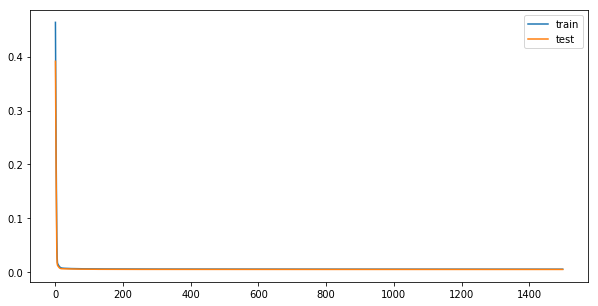

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


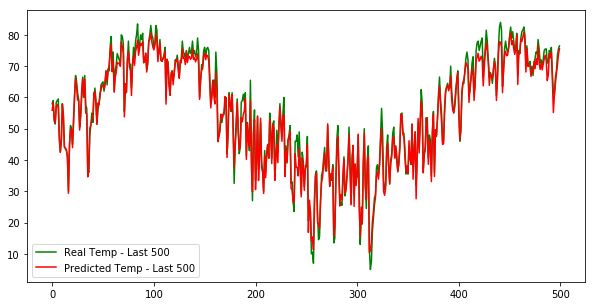

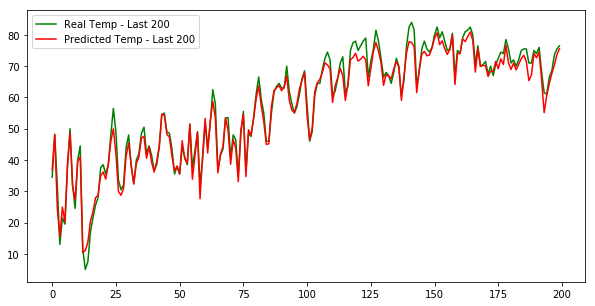

epoch_num: 1500 neuron_num: 1
Test MSE: 47.240
Test RMSE: 6.873
Goodness of fit: 0.850
Mean Absolute Percentage Error: 14.360

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/2000
 - 1s - loss: 0.2982 - val_loss: 0.2478
Epoch 2/2000
 - 0s - loss: 0.1923 - val_loss: 0.1501
Epoch 3/2000
 - 0s - loss: 0.1126 - val_loss: 0.0835
Epoch 4/2000
 - 0s - loss: 0.0639 - val_loss: 0.0474
Epoch 5/2000
 - 0s - loss: 0.0406 - val_loss: 0.0320
Epoch 6/2000
 - 0s - loss: 0.0315 - val_loss: 0.0260
Epoch 7/2000
 - 0s - loss: 0.0277 - val_loss: 0.0233
Epoch 8/2000
 - 0s - loss: 0.0254 - val_loss: 0.0213
Epoch 9/2000
 - 0s - loss: 0.0233 - val_loss: 0.0193
Epoch 10/2000
 - 0s - loss: 0.0212 - val_loss: 0.0175
Epoch 11/2000
 - 0s - loss: 0.0191 - val_loss: 0.0156
Epoch 12/2000
 - 0s - loss: 0.0172 - val_loss: 0.0140
Epoch 13/2000
 - 0s - loss: 0.0154 - val_loss: 0.0125
Epoch 14/2000
 - 0s - loss: 0.0138 - val_loss: 0.01

 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 148/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 149/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 150/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 151/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 152/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 153/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 154/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 155/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 156/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 157/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 158/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 159/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 160/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 161/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 162/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 163/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 164/2000
 - 0s - loss: 0.0056 - val_loss: 0.0051
Epoch 165/2000
 - 0s - lo

 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 297/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 298/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 299/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 300/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 301/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 302/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 303/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 304/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 305/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 306/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 307/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 308/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 309/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 310/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 311/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 312/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 313/2000
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 314/2000
 - 0s - lo

 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 446/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 447/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 448/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 449/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 450/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 451/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 452/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 453/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 454/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 455/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 456/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 457/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 458/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 459/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 460/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 461/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 462/2000
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 463/2000
 - 0s - lo

 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 595/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 596/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 597/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 598/2000
 - 1s - loss: 0.0054 - val_loss: 0.0049
Epoch 599/2000
 - 1s - loss: 0.0054 - val_loss: 0.0049
Epoch 600/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 601/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 602/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 603/2000
 - 1s - loss: 0.0054 - val_loss: 0.0049
Epoch 604/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 605/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 606/2000
 - 1s - loss: 0.0054 - val_loss: 0.0049
Epoch 607/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 608/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 609/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 610/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 611/2000
 - 0s - loss: 0.0054 - val_loss: 0.0049
Epoch 612/2000
 - 0s - lo

 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 744/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 745/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 746/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 747/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 748/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 749/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 750/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 751/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 752/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 753/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 754/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 755/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 756/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 757/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 758/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 759/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 760/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 761/2000
 - 0s - lo

 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 893/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 894/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 895/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 896/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 897/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 898/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 899/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 900/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 901/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 902/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 903/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 904/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 905/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 906/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 907/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 908/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 909/2000
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 910/2000
 - 0s - lo

Epoch 1041/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1042/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1043/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1044/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1045/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1046/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1047/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1048/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1049/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1050/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1051/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1052/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1053/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1054/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1055/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1056/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1057/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1058/2000
 - 0s - loss: 0.0052 - val_loss:

Epoch 1188/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1189/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1190/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1191/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1192/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1193/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1194/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1195/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1196/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1197/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1198/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1199/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1200/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1201/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1202/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1203/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1204/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1205/2000
 - 0s - loss: 0.0052 - val_loss:

Epoch 1335/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1336/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1337/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1338/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1339/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1340/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1341/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1342/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1343/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1344/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1345/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1346/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1347/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1348/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1349/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1350/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1351/2000
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 1352/2000
 - 0s - loss: 0.0052 - val_loss:

Epoch 1482/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1483/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1484/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1485/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1486/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1487/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1488/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1489/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1490/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1491/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1492/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1493/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1494/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1495/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1496/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1497/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1498/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1499/2000
 - 0s - loss: 0.0051 - val_loss:

Epoch 1629/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1630/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1631/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1632/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1633/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1634/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1635/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1636/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1637/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1638/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1639/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1640/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1641/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1642/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1643/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1644/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1645/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1646/2000
 - 0s - loss: 0.0051 - val_loss:

Epoch 1776/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1777/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1778/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1779/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1780/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1781/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1782/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1783/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1784/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1785/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1786/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1787/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1788/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1789/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1790/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1791/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1792/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1793/2000
 - 0s - loss: 0.0051 - val_loss:

Epoch 1923/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1924/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1925/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1926/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1927/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1928/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1929/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1930/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1931/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1932/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1933/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1934/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1935/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1936/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1937/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1938/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1939/2000
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1940/2000
 - 0s - loss: 0.0051 - val_loss:

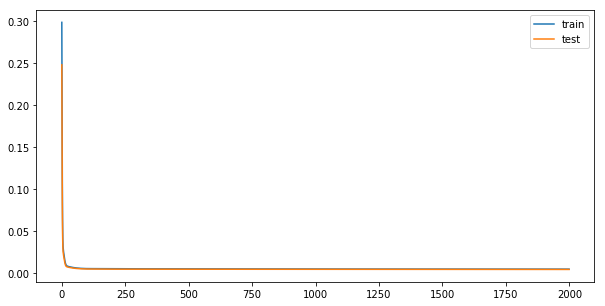

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


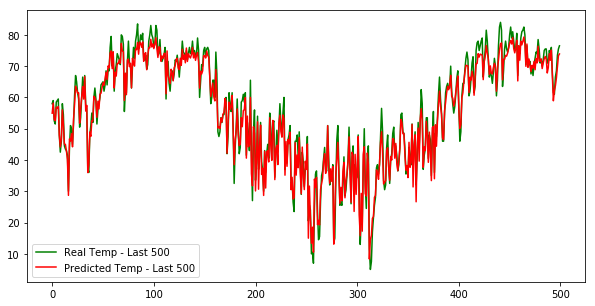

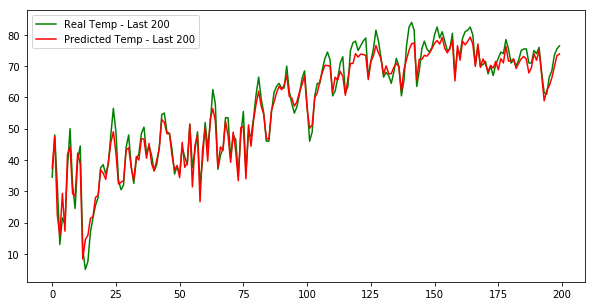

epoch_num: 2000 neuron_num: 1
Test MSE: 45.147
Test RMSE: 6.719
Goodness of fit: 0.857
Mean Absolute Percentage Error: 14.099

________________________________________________________________________________
Train on 1825 samples, validate on 1332 samples
Epoch 1/2500
 - 1s - loss: 0.3964 - val_loss: 0.3646
Epoch 2/2500
 - 0s - loss: 0.3138 - val_loss: 0.2860
Epoch 3/2500
 - 0s - loss: 0.2359 - val_loss: 0.1999
Epoch 4/2500
 - 0s - loss: 0.1469 - val_loss: 0.1044
Epoch 5/2500
 - 0s - loss: 0.0686 - val_loss: 0.0427
Epoch 6/2500
 - 0s - loss: 0.0323 - val_loss: 0.0231
Epoch 7/2500
 - 0s - loss: 0.0229 - val_loss: 0.0184
Epoch 8/2500
 - 0s - loss: 0.0199 - val_loss: 0.0163
Epoch 9/2500
 - 1s - loss: 0.0178 - val_loss: 0.0145
Epoch 10/2500
 - 0s - loss: 0.0158 - val_loss: 0.0128
Epoch 11/2500
 - 1s - loss: 0.0141 - val_loss: 0.0115
Epoch 12/2500
 - 0s - loss: 0.0126 - val_loss: 0.0104
Epoch 13/2500
 - 0s - loss: 0.0114 - val_loss: 0.0095
Epoch 14/2500
 - 0s - loss: 0.0105 - val_loss: 0.00

 - 0s - loss: 0.0055 - val_loss: 0.0051
Epoch 148/2500
 - 0s - loss: 0.0055 - val_loss: 0.0051
Epoch 149/2500
 - 0s - loss: 0.0055 - val_loss: 0.0051
Epoch 150/2500
 - 0s - loss: 0.0055 - val_loss: 0.0051
Epoch 151/2500
 - 0s - loss: 0.0055 - val_loss: 0.0051
Epoch 152/2500
 - 0s - loss: 0.0055 - val_loss: 0.0051
Epoch 153/2500
 - 0s - loss: 0.0055 - val_loss: 0.0051
Epoch 154/2500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 155/2500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 156/2500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 157/2500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 158/2500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 159/2500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 160/2500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 161/2500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 162/2500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 163/2500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 164/2500
 - 0s - loss: 0.0055 - val_loss: 0.0050
Epoch 165/2500
 - 0s - lo

 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 297/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 298/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 299/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 300/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 301/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 302/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 303/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 304/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 305/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 306/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 307/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 308/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 309/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 310/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 311/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 312/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 313/2500
 - 0s - loss: 0.0054 - val_loss: 0.0050
Epoch 314/2500
 - 0s - lo

 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 446/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 447/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 448/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 449/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 450/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 451/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 452/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 453/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 454/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 455/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 456/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 457/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 458/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 459/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 460/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 461/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 462/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 463/2500
 - 0s - lo

 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 595/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 596/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 597/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 598/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 599/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 600/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 601/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 602/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 603/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 604/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 605/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 606/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 607/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 608/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 609/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 610/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 611/2500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 612/2500
 - 0s - lo

 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 744/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 745/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 746/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 747/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 748/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 749/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 750/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 751/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 752/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 753/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 754/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 755/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 756/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 757/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 758/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 759/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 760/2500
 - 0s - loss: 0.0052 - val_loss: 0.0048
Epoch 761/2500
 - 0s - lo

 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 893/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 894/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 895/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 896/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 897/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 898/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 899/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 900/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 901/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 902/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 903/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 904/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 905/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 906/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 907/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 908/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 909/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 910/2500
 - 0s - lo

Epoch 1041/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1042/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1043/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1044/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1045/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1046/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1047/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1048/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1049/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1050/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1051/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1052/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1053/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1054/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1055/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1056/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1057/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1058/2500
 - 0s - loss: 0.0051 - val_loss:

Epoch 1188/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1189/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1190/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1191/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1192/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1193/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1194/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1195/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1196/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1197/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1198/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1199/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1200/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1201/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1202/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1203/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1204/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1205/2500
 - 0s - loss: 0.0051 - val_loss:

Epoch 1335/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1336/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1337/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1338/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1339/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1340/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1341/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1342/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1343/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1344/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1345/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1346/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1347/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1348/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1349/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1350/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1351/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1352/2500
 - 0s - loss: 0.0051 - val_loss:

Epoch 1482/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1483/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1484/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1485/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1486/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1487/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1488/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1489/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1490/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1491/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1492/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1493/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1494/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1495/2500
 - 1s - loss: 0.0051 - val_loss: 0.0047
Epoch 1496/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1497/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1498/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1499/2500
 - 0s - loss: 0.0051 - val_loss:

Epoch 1629/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1630/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1631/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1632/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1633/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1634/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1635/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1636/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1637/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1638/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1639/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1640/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1641/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1642/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1643/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1644/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1645/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1646/2500
 - 0s - loss: 0.0051 - val_loss:

Epoch 1776/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1777/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1778/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1779/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1780/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1781/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1782/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1783/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1784/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1785/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1786/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1787/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1788/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1789/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1790/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1791/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1792/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1793/2500
 - 0s - loss: 0.0051 - val_loss:

Epoch 1923/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1924/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1925/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1926/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1927/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1928/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1929/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1930/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1931/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1932/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1933/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1934/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1935/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1936/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1937/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1938/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1939/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 1940/2500
 - 0s - loss: 0.0051 - val_loss:

Epoch 2070/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2071/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2072/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2073/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2074/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2075/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2076/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2077/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2078/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2079/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2080/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2081/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2082/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2083/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2084/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2085/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2086/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2087/2500
 - 0s - loss: 0.0051 - val_loss:

Epoch 2217/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2218/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2219/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2220/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2221/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2222/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2223/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2224/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2225/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2226/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2227/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2228/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2229/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2230/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2231/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2232/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2233/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2234/2500
 - 0s - loss: 0.0051 - val_loss:

Epoch 2364/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2365/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2366/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2367/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2368/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2369/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2370/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2371/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2372/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2373/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2374/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2375/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2376/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2377/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2378/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2379/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2380/2500
 - 0s - loss: 0.0051 - val_loss: 0.0047
Epoch 2381/2500
 - 0s - loss: 0.0051 - val_loss:

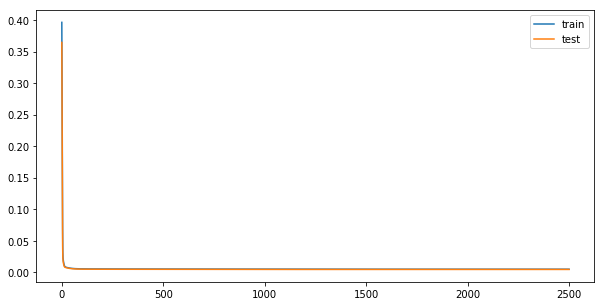

If the test loss drops below training loss, 
the model may be overfitting the training data. 

Model predictions shape:  (1332, 1)


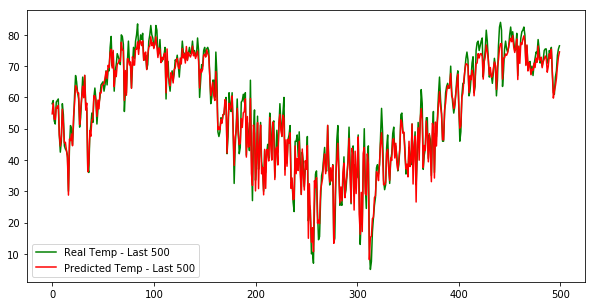

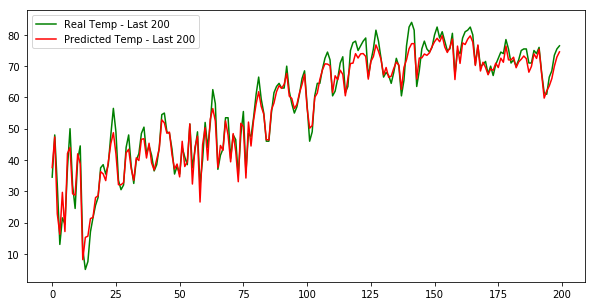

epoch_num: 2500 neuron_num: 1
Test MSE: 45.145
Test RMSE: 6.719
Goodness of fit: 0.857
Mean Absolute Percentage Error: 14.108

________________________________________________________________________________


In [15]:
model_epoch = []
model_neuron = []
model_rmse = []
model_r2 = []
model_mse = []
model_mape = []


# Batch - number of training examples in a forward/backwards pass
batch_num = 27
# Number of model runs: 
model_runs = 1
# Number of neurons
neurons = [1]
# Epochs - number of forward and backward passes of all training examples
epochs = [1500, 2000, 2500]
for run in range(model_runs):
    for epoch_num in epochs:
        for neuron_num in neurons:  
            # reshape the X input to be 3D [samples, timesteps, features]
            train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
            test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
            
            # Fit the model: 
            modelLSTM3 = fit_model(train_X, train_y, test_X, test_y, batch_num, epoch_num, neuron_num)
            # Make the prediction on test data
            yhat = modelLSTM3.predict(test_X, batch_size=batch_num)
            print('Model predictions shape: ', yhat.shape)
        
        
            # print('Scale back to get non scaled scores:') 
            # print('Concat predicted test y and x, then scale back:')
            test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
            yhat_concat = concatenate((yhat, test_X[:, -2:]), axis=1)
            yhat_concat_inverse  = scaler.inverse_transform(yhat_concat)
            predictions  = yhat_concat_inverse[:,0]
        
        
            # print('Concat real test y and x, then scale back:')
            test_y = test_y.reshape((len(test_y), 1))
            y_concat = concatenate((test_y, test_X[:, -2:]), axis=1)
            y_concat_inverse = scaler.inverse_transform(y_concat)
            scaledBack_test_y = y_concat_inverse[:,0]
        
        
            # Real vs Predicted values: 
            # Because X (and thus predictions) is one day behind Y. The time series plot look a bit off. 
            # Let's place back the data so we can see the plots better
            # The prediction “prediction” is one index ahead of real output “scaledBack_test_y”.
            plot_y = scaledBack_test_y[:-1]
            plot_predictions = predictions[1:]

        
            pyplot.plot(plot_y[-500:], color='green', label = 'Real Temp - Last 500')
            pyplot.plot(plot_predictions[-500:], color='red', label = 'Predicted Temp - Last 500')
            pyplot.legend()
            pyplot.show()
        
            pyplot.plot(plot_y[-200:], color='green', label = 'Real Temp - Last 200')
            pyplot.plot(plot_predictions[-200:], color='red', label = 'Predicted Temp - Last 200')
            pyplot.legend()
            pyplot.show()
            
            # Score the test: 
            print("epoch_num:", epoch_num, "neuron_num:", neuron_num )
            mse = mean_squared_error(scaledBack_test_y, predictions)
            print('Test MSE: %.3f' % mse)
            rmse = sqrt(mean_squared_error(scaledBack_test_y, predictions))
            print('Test RMSE: %.3f' % rmse)
            r2score = r2_score(scaledBack_test_y, predictions)
            print('Goodness of fit: %.3f' % r2score)
            model_mse.append(mse)
            model_rmse.append(rmse)
            model_r2.append(r2score)
            model_epoch.append(epoch_num)
            model_neuron.append(neuron_num,)
            # Mean Absolute Percentage Error
            # http://mariofilho.com/create-simple-machine-learning-model-predict-time-series/
            # MAPE, as it is scale-independent 
            # and represents the ratio of error to actual values as a percent
            def mape(y_pred,y_true):
                return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            mapescore = mape(predictions,scaledBack_test_y)
            model_mape.append(mapescore)
            print('Mean Absolute Percentage Error: %.3f' % mapescore)
            print()
            print('________________________________________________________________________________')
            #
            #model_autocorr = []
            #model_normal = []
            #model_variance = []
            
        

In [16]:
predictionSummary = pd.DataFrame({
                                  'Epochs':np.array(model_epoch),
                                  'Neurons':np.array(model_neuron),
                                  'R2':np.array(model_r2),
                                  'RMSE':np.array(model_rmse),
                                  'MSE':np.array(model_mse),
                                  'MAPE':np.array(model_mape),})
                                  

print('LSTM Lag3 Results - Sorted by R2 (Coefficient Of Determination - Goodness of fit) :')
print()
print(predictionSummary.sort_values(by=['R2'], ascending=False)) 
# Only for more than one number of model runs: 
# print()
# print(predictionSummary.describe())



LSTM Lag3 Results - Sorted by R2 (Coefficient Of Determination - Goodness of fit) :

   Epochs  Neurons        R2      RMSE        MSE       MAPE
2    2500        1  0.856858  6.719011  45.145107  14.108427
1    2000        1  0.856853  6.719126  45.146652  14.099252
0    1500        1  0.850216  6.873131  47.239929  14.360140


In [17]:
predictionSummary.to_csv('./data/LSTMExploreSummary.csv')
print(datetime.now() - startTime)

0:33:33.261952
